<a href="https://colab.research.google.com/github/godsesaurab/data-science-projects/blob/main/House%20Price%20Prediction%20using%20Machine%20Learning%20in%20Python/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction using Machine Learning in Python

House price prediction is a problem in the real estate industry to make informed decisions. By using machine learning algorithms we can predict the price of a house based on various features such as location, size, number of bedrooms and other relevant factors.

### **Feature Descriptions**
* **Id**	- To count the records.
* **MSSubClass**	- Identifies the type of dwelling involved in the sale.
* **MSZoning**	- Identifies the general zoning classification of the sale.
* **LotArea**	 - Lot size in square feet.
* **LotConfig**	- Configuration of the lot
* **BldgType**	- Type of dwelling
* **OverallCond**	- Rates the overall condition of the house
* **YearBuilt**	- Original construction year
* **YearRemodAdd**	- Remodel date (same as construction date if no remodeling or additions).
* **Exterior1st**	- Exterior covering on house
* **BsmtFinSF2**	- Type 2 finished square feet.
* **TotalBsmtSF**	- Total square feet of basement area
* **SalePrice** -	To be predicted





## 1. Importing Libraries and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/godsesaurab/data-science-projects/main/House%20Price%20Prediction%20using%20Machine%20Learning%20in%20Python/HousePricePrediction.xlsx'

houseDf = pd.read_excel(url)

display(houseDf.head())

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [3]:
houseDf.shape


(2919, 13)

## 2. Data Preprocessing

In [4]:
obj = (houseDf.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical Variables: ", len(object_cols))

int_ = (houseDf.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer Variables: ",len(num_cols))

fl = (houseDf.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float Variables:",len(fl_cols))



Categorical Variables:  4
Integer Variables:  6
Float Variables: 3


## 3. Exploratory Data Analysis

<Axes: >

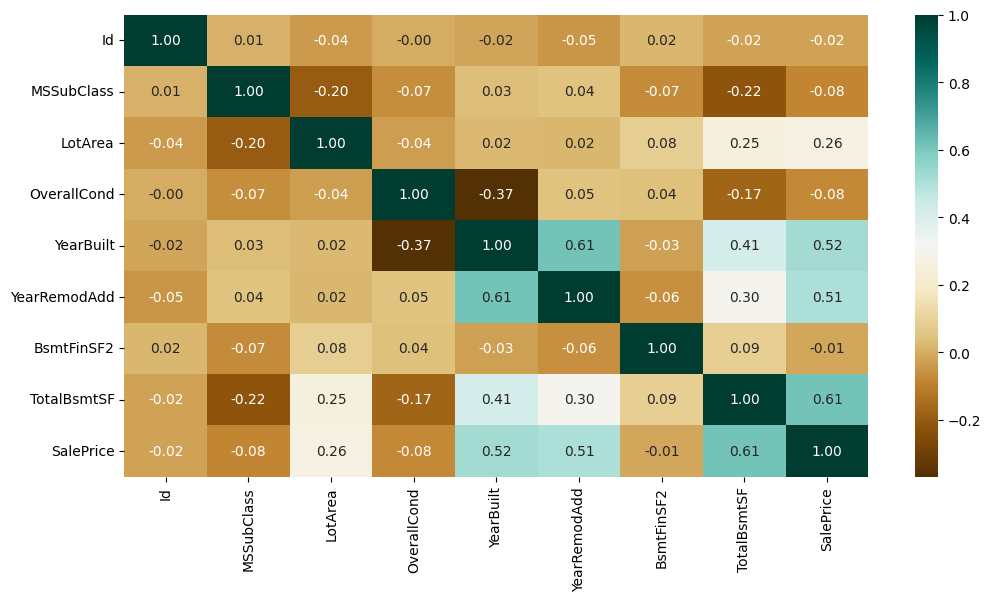

In [5]:
numerical_dataset = houseDf.select_dtypes(include=['number'])

plt.figure(figsize=(12,6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            annot = True)

<Axes: title={'center': 'No. Unique values of Categorical Features'}, xlabel='None'>

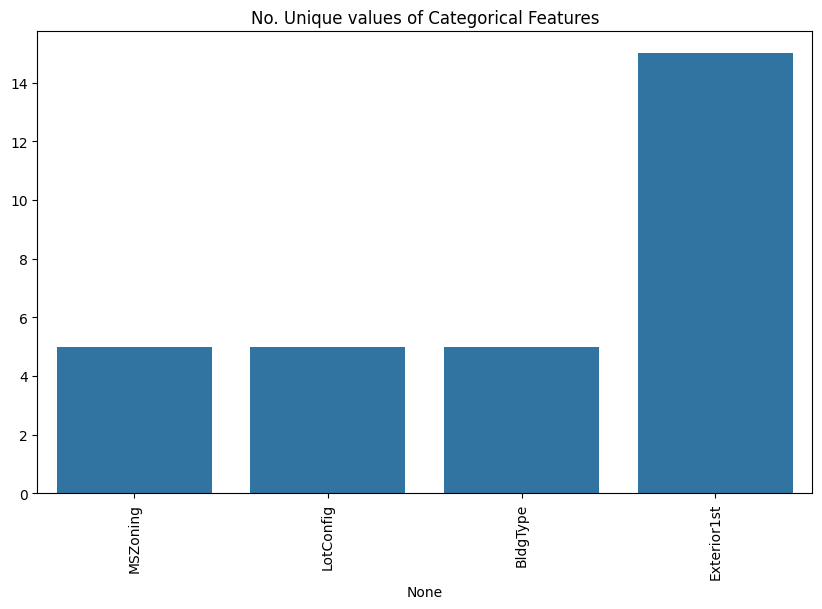

In [20]:
unique_values = []
object_cols = houseDf.select_dtypes(include=['object'])
# display(object_cols)
for col in object_cols.columns:
  # print(col)
  unique_values.append(houseDf[col].nunique())
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols.columns,y=unique_values)

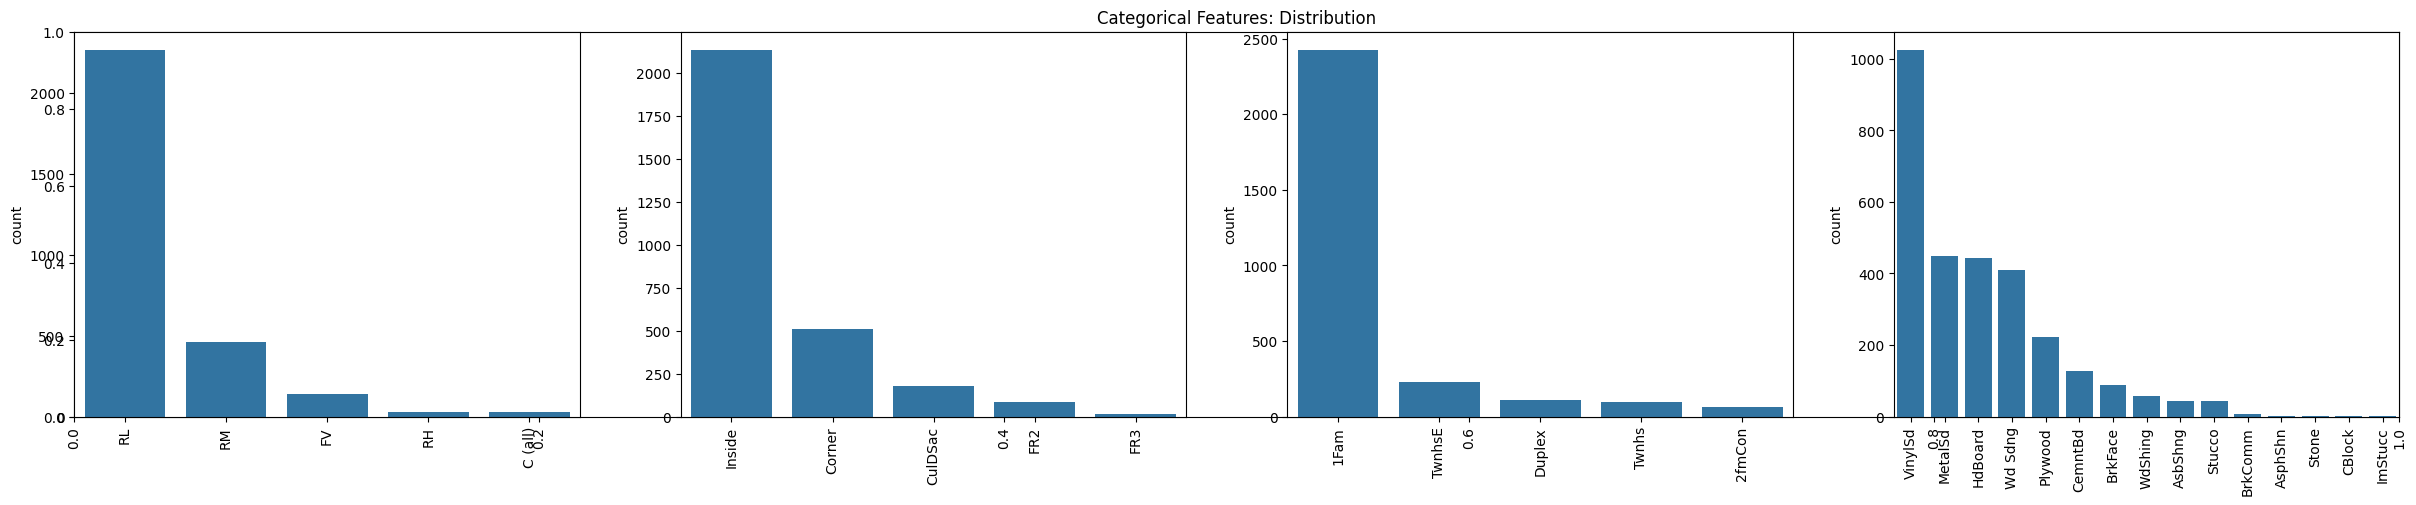

In [34]:
plt.figure(figsize=(30,5))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols.columns:
  y = houseDf[col].value_counts()
  plt.subplot(1,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index),y=y)
  index += 1

## 4. Data Cleaning

In [36]:
houseDf.drop(['Id'],
             axis=1,inplace=True)

In [37]:
houseDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2919 non-null   int64  
 1   MSZoning      2915 non-null   object 
 2   LotArea       2919 non-null   int64  
 3   LotConfig     2919 non-null   object 
 4   BldgType      2919 non-null   object 
 5   OverallCond   2919 non-null   int64  
 6   YearBuilt     2919 non-null   int64  
 7   YearRemodAdd  2919 non-null   int64  
 8   Exterior1st   2918 non-null   object 
 9   BsmtFinSF2    2918 non-null   float64
 10  TotalBsmtSF   2918 non-null   float64
 11  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 273.8+ KB


In [39]:
houseDf['SalePrice'] = houseDf['SalePrice'].fillna(
    houseDf['SalePrice'].mean()
)

In [40]:
newHouseDf = houseDf.dropna()

In [41]:
newHouseDf.isnull().sum()

,0
MSSubClass,0
MSZoning,0
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,0
BsmtFinSF2,0


## 5. OneHotEncoder - For Label Categorical Features

In [42]:
from sklearn.preprocessing import OneHotEncoder

s = (newHouseDf.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical Variables:", object_cols)
print("No. of Categorical features:",len(object_cols))


Categorical Variables: ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of Categorical features: 4


In [46]:
OH_encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(newHouseDf[object_cols]))
OH_cols.index = newHouseDf.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = newHouseDf.drop(object_cols,axis=1)
df_final = pd.concat([df_final,OH_cols], axis=1)

In [47]:
df_final

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.00000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,11250,5,2001,2002,0.0,920.0,223500.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,9550,5,1915,1970,0.0,756.0,140000.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,14260,5,2000,2000,0.0,1145.0,250000.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,1936,7,1970,1970,0.0,546.0,180921.19589,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,160,1894,5,1970,1970,0.0,546.0,180921.19589,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2916,20,20000,7,1960,1996,0.0,1224.0,180921.19589,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2917,85,10441,5,1992,1992,0.0,912.0,180921.19589,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6. Splitting Dataset into Training and Testing

In [49]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis = 1)
Y = df_final['SalePrice']

X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y,
                                                      train_size = 0.8,
                                                      test_size = 0.2,
                                                      random_state = 0)

## 7. Model Training and Accuracy

As we have to train the model to determine the continuous values, so we will be using these regression models.

* SVM-Support Vector Machine
* Random Forest Regressor
* Linear Regressor

And To calculate loss we will be using the mean_absolute_percentage_error module

### i. SVM - Support Vector Machine
Support vector Machine is a supervised machine learning algorithm primarily used for classification tasks though it can also be used for regression. It works by finding the hyperplane that best divides a dataset into classes. The goal is to maximize the margin between the data points and the hyperplane

In [50]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

In [51]:
model_SVR = svm.SVR()
model_SVR.fit(X_train, Y_train)

Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid,Y_pred))

0.1870512931870423


### ii. Random Forest Regression
Random Forest is an ensemble learning algorithm used for both classification and regression tasks. It constructs multiple decision trees during training where each tree in the forest is built on a random subset of the data and features, ensuring diversity in the model. The final output is determined by averaging the outputs of individual trees (for regression) or by majority voting (for classification).

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
model_RFR = RandomForestRegressor(n_estimators = 10)
model_RFR.fit(X_train, Y_train)

Y_pred = model_RFR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.1861477071625909


## iii. Linear Regresssion
Linear Regression is a statistical method used for modeling the relationship between a dependent variable and one or more independent variables. The goal is to find the line that best fits the data. This is done by minimizing the sum of the squared differences between the observed and predicted values. Linear regression assumes that the relationship between variables is linear.


In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)

Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.1874168384159986


Clearly Random Forest Regressor model is giving better accuracy as the mean absolute percentage error is the least among all the other regressor models i.e. 0.186 approx. To get much better results ensemble learning techniques like Bagging and Boosting can also be used.